<u>**Making a coverage path based on a polygon considering an obstacle**</u>

**1. Create lat, lon positions of outer perimeter into ROSBAG** <br>

1. Start tractor; Initiate GUI.  Press 'Start'; Wait for the green icon indicating RTK fix, then record all data.
2. Drive the location/site and save the data in rosbag including driving around obstacles. My suggestion is to drive the path twice.
3. In /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/ create a folder (e.g. 'site1_20240513') to hold the working files
4. Copy the rosbag file into that folder.  Note that my github account has a storage limit, where this file will be uploaded to, of 2GB.

**2. Extract raw data from rosbag**<br>
<br>  • Open the program ~/project_notes/code_for_testing/archive/rosbag_utilities/rosbag_latlon_to_csv.py 
<br>  • This script reads from the /fix topic in the rosbag and extracts the lat/lon data and creates a .csv file.  It also pulls the data from /odom topic to get x and y pose data.
<br>  • Open the script and adjust the output and input file names for your recent data.
<br>        ◦ Line 31 – bagfile_path
<br>        ◦ Line 32 – rosbag_filename
<br>        ◦ Line 33 -  csv_filename
<br>        ◦ Line 34 – gap_between_pts (optional – I have it set at 1 meter)
<br>    • Run the script and open “ csv_filename” output

**3. Manually select outer path**<br>
Use Plotjuggler to display the path from the rosbag while having the .csv file open.  To start: $ rosrun plotjuggler plotjuggler
<br>            ▪ Load data from file (i.e. the rosbag file); Select at least the odom statement that contains the x and y pose data; I also included the /fix in order to cross reference the lat, lon data.
<br>            ▪ If you previously saved a template with the pose data displayed you can open the .xml file (look in ~/project_notes)
<br>            ▪ In PlotJuggler on the left side, open the /odom/pose/pose/pose to get to the x and y data; Highlight x and y; Use the right mouse button to move the data onto the tab; Select OK
Add columns to the .csv file to attribute the points you want to make up the outer path.<br>
Attribute each point with identifiers to show which segment the point was associated with and the sequence the point should be run in for the counter-clockwise path. I used Plotjuggler to review the quality of the points and get time stamps to determine which points to keep and to discard.<br><br>
<img src="images/plotjuggler1.png" alt="Plotjuggler screen" width="600px">
<br>
<br>    • In the example above I have the rosbag file loaded in Plotjuggler.  I can see the x and y coordinates in the left side and I can see where the tractor is based on the dot.  I can look at the .csv file and find the time_delta data in column A and compare that to the time stamp in PlotJuggler.
<br>    • In the .csv file add two (2) columns, Reference and Original Sequence.  Original Sequence should be a value from 1-n that represents the original path ran in case you need to rebuild the spreadsheet and to help sort the points to be replayed in the sequence they were run.
<br>    • Press play in PlotJuggler and decide which time stamps represent the path you want to follow.
<br>    • In the Reference column I label each row with ‘disregard’, ‘obstacle’, ‘tree’ or one of the four sections that I want to follow.  I labeled them LR corner for lower right, LL corner for lower left and so on.
<br>    • Save the .csv file as a spreadsheet (i.e. .ods file)
<br>    • Add a column for “Path 1” and place a ‘y’ or ‘n’ on whether those points should be repeated.
<br>    • I sorted based on Path 1 (i.e. y or n) to get the points I know I want to repeat.
<br>    • Now decide where to start and how to get the points in the correct sequence.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ I want to start in the Upper Right corner at ~-5, 12
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ A point leading into that point would be -2.5, 14.6 if you need earlier point
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ The output chute of the mower is on the right side so my path would be the starting point to the lower right, then lower left, then upper left and finish the upper right.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Part of the upper right is the start and part of the upper right is the end.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Sort by ‘UR corner’ and Sequence.  Try to determine which is the beginning and which is the end.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Play Plotjuggler and see which are clearly at the end and which a clearly at the beginning.  Mark those points in a separate column.  I used ‘beginning’, ‘end’, ‘first point’ and ‘last point’.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ Choose which point is the very last and the very first.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ I then added another column for Path Sequence.  I labeled first point as ‘1’ and worked around the other corners numbering the points to repeat in sequence until you have a complete sequence.
<br>&nbsp;&nbsp;&nbsp;&nbsp;◦ If not already, save the spreadsheet as an .xlsx file<br>
<img src="images/csv_file1.png" alt="Plotjuggler screen" width="600px">
<br>

**4. Determine Obstacle Center Points and Diameter**<br>
<br>    • Open ~code_for_testing/archive/path_polygon_rings/path_calc_circle_radius_and_center6.py
<br>    • Update / Confirm the values for:
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 157 - folder_path 
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 158 - .xlsx_filename
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 159 - tag_reference (this ID’s which obstacle to calculate – an enhancement would be to scan the site survey for all obstacles and put them in a list)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 160 – result_sheet_name (not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 161 – data_sheet_name (not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 162 - inflation = 0.3   (this is a safety measure, not expected to change)
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 183 - num_points = 20 (not expected to change)
<br>    • Run the program and review results in sheets (e.g. ‘Obstcl_list’ and ‘Obstacle 1’).  The output of the script above will be similar to below:
<br><br>
<img src="images/circle_1.png" alt="Plotjuggler screen" width="600px">
<br>
<br>    • The red dots represent points from the original path driven; The blue circle represents the best fit and the green line segments are used later to find intersection points with the path to be driven.  The green line segments have an ‘inflation’ factor added for safety that is adjustable.
<br>Inputs:
<br>- folder_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/'
<br>- xlsx_filename = folder_path + 'collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
<br>- data_sheet_name = 'SiteSurvey'
<br>Outputs:
<br>- result_sheet_name = 'Obstcl_list' 
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_calc_circle_radius_and_center6.py
</span>


**5. Create The Ring Path Paths Based on Site Survey Data**
<br>    • After the site survey .ods spreadsheet  has been updated by attributing each row with data about which corner the row is associated with), and any obstacle paths have been calculated open ~/code_for_testing/archive/path_polygon_rings/path_create_rings6.py
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 70 - folder_path
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 71 – file_path
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 83 – Change ‘999’ if there are more than 1000 steps in the path mission
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 84 – num_inner_rings – this plus the path size determines how big the head-space is.
<br>&nbsp;&nbsp;&nbsp;&nbsp;        ◦ Line 85 - path_size = 1.0 – 42” cutting deck is actually 1.06 meters
<br>
<br> Input:
<br>- folder_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/'
<br>- file_path = 'collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
<br>- filtered_data = sheet_data['SiteSurvey'][sheet_data['SiteSurvey']['Path Sequence'].between(1, 999)]
<br>Output:
<br>- inner_rings_df.to_excel(writer, sheet_name='RawInnerRings', index=False)
<br><br>    • Run the program and review results in sheet ‘RawInnerRings’.
<br>
<img src="images/outer_paths_1.png" alt="Outer path fig 1" width="600px">
<br>
<img src="images/outer_paths_2.png" alt="Outer path fig 2" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_create_rings6.py
</span>

**6. For the ring path, determine the intersection points with obstacles and plan around them**
<br>    • Run ~code_for_testing/archive/path_polygon_rings/find_circle_intersections7.py
<br>    • This program reads the x. y and radius of the obstacle/circle and calculates the intersection points. 
<br>    • It also calculates the shortest path around the obstacle.
<br>    • This code will combine the parts of the original path with the parts that go around the obstacle into an updated sheet representing the revised path to follow.

Inputs:
<br>    • df_raw_inner_rings = pd.read_excel(xlsx_file_path, sheet_name='RawInnerRings', engine='openpyxl')
<br>    • df_obstcl_list = pd.read_excel(xlsx_file_path, sheet_name='Obstcl_list', engine='openpyxl')
<br>Outputs:
<br>    • all_intersection_data.to_excel(writer, sheet_name='IntersectionPoints', index=False)

<br>
<img src="images/intersections_1.png" alt="Intersections fig 1.png" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/find_circle_intersections7.py
</span>

**7. Build the concentric polygon path**
<br>    • Copy the statement below to run 'build_concentric_polygon_path.py'
<br>    • This code will combine the parts of the original path with the parts that go around the obstacle into an updated sheet representing the revised path to follow.
<br>    • The inner most ring, which is 'Path_Index=0' in the sheet, will be used to create a stripe path.
<br>    • Below is sample output.
<br>
<br>Input:
<br>    • xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
<br>    • df = pd.read_excel(file_path, sheet_name='ArcPath') 
<br>    • df = pd.read_excel(file_path, sheet_name='IntersectionPoints')
<br>    • df = pd.read_excel(file_path, sheet_name='UpdatedPath')
<br>    • df = pd.read_excel(xlsx_file_path, sheet_name='RawInnerRings')
<br>Output:
<br>    • df.to_excel(writer, sheet_name='UpdatedPath', index=False)
<br>
<br>
<img src="images/outer_rings1.png" alt="Outer Rings fig 1.png" width="600px">
<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/build_concentric_polygon_path.py
</span>

**8. Add angle, speed and look ahead data to the x, y data for ring path**<br>

The outpute from the above process is x and y data for each ring.  Additional data must be added before it can be used as complete input to drive the robot.<br><br>
Input:<br>
- input_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
- input_sheet_name = 'UpdatedPath'
- lookahead = 2.5
- speed = 0.75
<br>Output:
- output_sheet_name = 'outer_rings_path'<br>
<br>
(The number of x, y points is determined by pulling data from the rosbag. I may be confused about do I have the correct number of points.  When using the Dubins path generator I provide main points of the line segment and u-turn.  The generator fills in the additional points.)
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_add_angle_to_xy_for_outer_ring.py
</span>
<br>



**9. Create initial Boustrophedon path**<br>
The script to run below uses the inner most polygon ring and creates a Boustrophedon coverage path of line segments.  You need to open the program and confirm the file name being read (xlsx_file_path) as well as the angle of the line segments (angle_degrees).  The innermost poloygon is defined in the sheet 'UpdatedPath'.
<br>Input:
- xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
- df = pd.read_excel(xlsx_file_path, sheet_name='UpdatedPath')

<br>Output:
- write_path_to_excel(path, xlsx_file_path, 'boustrphdn_segmnts')

<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_boustrophedon_coverage_variable_degree4.py
</span>

**10. Visualize the Boustrophedon path**<br>
Once the the script above has been run, you can run the script below to visualize the path. The reason this is important is there are likely to be a few line segments that need to be trimmed from the ends because either they are short or disconnected or both.<br><br>
**Note the file input name** I used sheet_name='stripes_trimmed'.  I previously used 'boustrphdn_segmnts_trimmed'.  Code needs to be updated at some point.

reading the file:  /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx


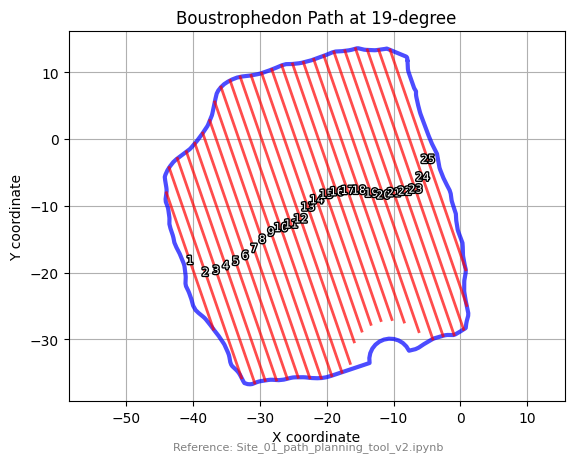

In [1]:
import pandas as pd
from shapely.geometry import Polygon, LineString
from matplotlib import pyplot as plt, patheffects
import os

def read_inner_ring(xlsx_file_path):
    # Read the specified sheet from the Excel file
    df = pd.read_excel(xlsx_file_path, sheet_name='UpdatedPath')
    # Filter the data to include only points with Path_Index = 0
    filtered_df = df[df['Path_Index'] == 0]
    # Create a list of points (tuples) from the filtered data
    polygon_points = list(zip(filtered_df['X'], filtered_df['Y']))
    # Return the polygon created from these points
    return Polygon(polygon_points)

# def read_boustrphdn_segments(xlsx_file_path):
#     # Read the specified sheet from the Excel file
#     #df = pd.read_excel(xlsx_file_path, sheet_name='boustrphdn_segmnts')
#     df = pd.read_excel(xlsx_file_path, sheet_name='stripes_trimmed')    
#     # Create a list of LineStrings from the data
#     path_lines = []
#     for _, row in df.iterrows():
#         path_lines.append(LineString([(row['x1'], row['y1']), (row['x2'], row['y2'])]))
#     return path_lines

def read_boustrphdn_segments(xlsx_file_path):
    # Read the specified sheet from the Excel file
    df = pd.read_excel(xlsx_file_path, sheet_name='stripes_trimmed')
    # Create a list of LineStrings from the data
    path_lines = []
    for _, row in df.iterrows():
        path_lines.append(LineString([(row['Start_X'], row['Start_Y']), (row['End_X'], row['End_Y'])]))
    return path_lines

def plot_path(polygon, path_lines, degree):
    fig, ax = plt.subplots()
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

    for idx, line in enumerate(path_lines):
        x, y = line.xy
        ax.plot(x, y, color='red', linewidth=2, alpha=0.7, zorder=2)
        # Position the text in the center of the line segment
        text_x = (x[0] + x[1]) / 2
        text_y = (y[0] + y[1]) / 2
        ax.text(text_x, text_y, str(idx + 1), fontsize=8, verticalalignment='center',
                horizontalalignment='center', color='white', path_effects=[
                patheffects.withStroke(linewidth=2, foreground="black")])

    ax.set_title(f'Boustrophedon Path at {degree}-degree')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.axis('equal')
    # Get the absolute path of the current script
    filepath = 'Site_01_path_planning_tool_v2.ipynb'
    plt.figtext(0.5, 0.01, f'Reference: {filepath}', ha='center', fontsize=8, color='gray')
    plt.show()

# Path to the Excel file
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'  
print("reading the file: ", xlsx_file_path)
angle_degrees = 19

# Read the polygon data from the Excel file
polygon = read_inner_ring(xlsx_file_path)

# get the boustrophedon segments from the Excel file
path_lines = read_boustrphdn_segments(xlsx_file_path)

# Plot the path
plot_path(polygon, path_lines, angle_degrees)

**11. Trim the initial Boustrophedon path to remove partial segments**<br>
This code defines the input and output file paths, and the number of lines to remove from the beginning and end. It then reads the CSV file line by line, skipping the specified number of lines at the beginning. The remaining lines are stored in a list. Finally, the code iterates through the list and removes the specified number of lines from the end. The trimmed data is then written to a new file with the word "trimmed" added to the original filename.<br><br>
Open the script below and edit the variables:
- beginning_lines_to_remove = 2
- end_lines_to_remove = 2
- xlsx_file_path

<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_boustrophedon_trim_segments.py
</span>

**12. For Boustrophedon path, shorten stripes to allow for u-turns**<br>Check the stripes for intersection with the obstacle.  Trim the Boustrophedon stripes.  The obstacle is on the edge of the polygon and therefore not fully inside the polygon which means I don't have to create a path around the obstacle.  The script ...boustrophedon/archive/path_shorten_stripes2.py will plot a visual if needed.<br>
<br>Input:
<br>    • folder_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/'
<br>    • file_path = 'collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
<br>    • full_path = folder_path + file_path
<br>    • polygon_sheet_name = 'RawInnerRings'
<br>    • stripes_sheet_name = 'boustrphdn_trimmed' - I need to double check where this is created
<br>    • circle_data = [(Point(-10.52, -33.01), 6)] - center point and radius - enhancement, pull this data from Obstacle sheet<br>
<br>Output:
<br>    • output_sheet_name = 'stripes_trimmed'
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_shorten_stripes3.py
</span>

**13. Visualize how the right angles are calculated**<br>
I need to calculate additional points to define the u-turn points.  This step is actually performed two steps below.  The most current cell below is only for informational purposes so you can see the calculation using hard coded data which is hopefully easier to understand.

<img src="images/dubins_image1.png" alt="Dubins Path" width="300px">
You can see for the'start points', which are at the bottom of the image, I need to calculate the point to the left of the start point. For the 'end points', which are at the top of the image, I need to calculate the point to the right of the end point.  These points make a right triangle.

The very first starting point will be ignored as this is the entry point into the continuous path.  Given the assumption is the continuous path is moving from left to right, the new bottom point to the left of the original line segment end point will have an x-axis value less than the the original line segment end point x value.  The new top point to the right of the top point will have an x-axis value greater than the the original line segment top point x value.  

The first small script below is simply a test showing how to use two hard coded points to create a third point and to plot it.  <br><br>

Note there is a change for 'preference' to  'greater' and 'less' to see how the hypotenuse line will shift sides. 


The solution for the hypotenuse with 'greater' preference is: larger on the x-axis
The angle 90.0 is within 0.05 degrees of 90 degrees.


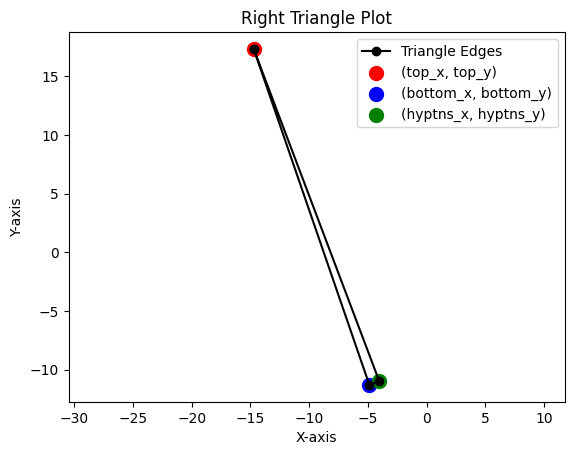

The solution for the hypotenuse with 'less' preference is: smaller on the x-axis
The angle 90.0 is within 0.05 degrees of 90 degrees.


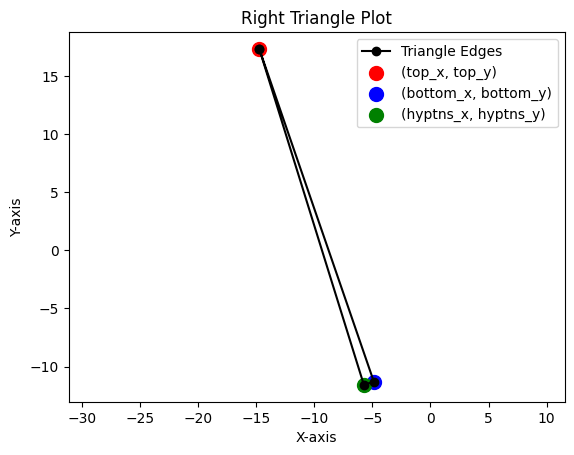

End of script


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_x3_y3_solutions(x1, y1, x2, y2, length=0.9):
    """
    Calculate two possible coordinates of the third point (x3, y3) to form a right triangle
    with the line segment from (x1, y1) to (x3, y3) as the hypotenuse. This function returns
    both solutions, allowing for a choice where x3 can be greater than x2.
    """
    dx = x2 - x1
    dy = y2 - y1

    # Normalize the direction vector (dx, dy)
    norm = np.sqrt(dx**2 + dy**2)
    dx /= norm
    dy /= norm

    # Rotate 90 degrees in both directions and scale by the desired length
    dx1, dy1 = -dy * length, dx * length  # First solution
    dx2, dy2 = dy * length, -dx * length  # Second solution

    # Calculate (x3, y3) for both solutions
    x3_1 = x2 + dx1
    y3_1 = y2 + dy1
    x3_2 = x2 + dx2
    y3_2 = y2 + dy2

    return (x3_1, y3_1), (x3_2, y3_2)

def choose_x3_y3_solution(x2, y2, x3_1, y3_1, x3_2, y3_2, preference='less'):
    """
    Choose the (x3, y3) point based on the preference.

    Parameters:
    - x3_1, y3_1, x2, y2, x3_2, y3_2: Coordinates of x3 and y3 from the first and second solutions, and x2, y2.
    - preference: Can be 'greater' or 'less' to choose which 'side' the hypotenuse should be on in relation to the x-axis.

    Returns:
    - x3, y3: The chosen coordinates of x3 and y3.
    - solution: A string indicating which solution was chosen.
    """
    if preference == 'greater':
        if x3_1 > x2:
            return x3_1, y3_1, "larger on the x-axis"
        else:
            return x3_2, y3_2, "smaller on the x-axis"
    else:  # preference is 'less'
        if x3_1 < x2:
            return x3_1, y3_1, "larger on the x-axis"
        else:
            return x3_2, y3_2, "smaller on the x-axis"

def angle_check(x1, y1, x2, y2, x3, y3, tolerance=0.05):
    """
    Check if the angle at (x2, y2) is close to 90 degrees within a specified tolerance.
    """
    # Vectors (x1,y1)->(x2,y2) and (x3,y3)->(x2,y2)
    vector1 = [x1 - x2, y1 - y2]
    vector2 = [x3 - x2, y3 - y2]

    # Dot product and magnitudes of vectors
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the angle in degrees
    angle = np.arccos(dot_product / (magnitude1 * magnitude2)) * (180 / np.pi)

    # Check if the angle is within the tolerance of 90 degrees
    if np.abs(angle - 90) > tolerance:
        print(f"Error: The angle {round(angle,2)} is not within 0.1 degrees of 90 degrees.")
    else:
        print(f"The angle {round(angle,2)} is within {tolerance} degrees of 90 degrees.")

def plot_triangle(x1, y1, x2, y2, x3, y3):
    plt.figure()

    # Plot the triangle lines first
    plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-o', color='black', label='Triangle Edges')

    # Set different colors for each point with increased size
    plt.scatter(x1, y1, color='red', s=100, label='(top_x, top_y)')
    plt.scatter(x2, y2, color='blue', s=100, label='(bottom_x, bottom_y)')
    plt.scatter(x3, y3, color='green', s=100, label='(hyptns_x, hyptns_y)')

    # Labels, title, and equal aspect ratio
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Right Triangle Plot')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Test points
top_x, top_y = -14.72, 17.32
bottom_x, bottom_y = -4.87, -11.29

# Calculate both possible (x3, y3) points
(hyptns_x_opt_a, hyptns_y_opt_a), (hyptns_x_opt_b, hyptns_y_opt_b) = calculate_x3_y3_solutions(top_x, top_y, bottom_x, bottom_y)

# Run with 'greater' preference
hyptns_x, hyptns_y, solution = choose_x3_y3_solution(bottom_x, bottom_y, hyptns_x_opt_a, hyptns_y_opt_a, hyptns_x_opt_b, hyptns_y_opt_b, preference='greater')
print(f"The solution for the hypotenuse with 'greater' preference is: {solution}")
angle_check(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)
plot_triangle(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)

# Run with 'less' preference
hyptns_x, hyptns_y, solution = choose_x3_y3_solution(bottom_x, bottom_y, hyptns_x_opt_a, hyptns_y_opt_a, hyptns_x_opt_b, hyptns_y_opt_b, preference='less')
print(f"The solution for the hypotenuse with 'less' preference is: {solution}")
angle_check(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)
plot_triangle(top_x, top_y, bottom_x, bottom_y, hyptns_x, hyptns_y)

print("End of script")


**14. Calculate the additional points to make a continuous coverage map**<br>
Use the approach crafted above to calculate the third point of a right triangle and iterate over the .csv file to calculate all the points in the full set of line segments.   
<br>
Open the program and update the key variables:<br>
- xlsx_file_path
- input_sheet_name = 'boustrphdn_trimmed'
- output_sheet_name = 'coverage_path'
<br>

The overview of the program is:<br>
1. Read the data into a DataFrame<br>
2. Assign the values for (x1, y1), (x2, y2) named (bottom_x, bottom_y), (top_x, top_y)<br>
3. Calculate the hypotenuse for the 'bottom' point<br>
4. Calculate the hypotenuse for the 'top' point<br>
5. Store the points in a DataFrame <br>
6. Move to the next line segment until complete<br>
7. Once the loop is complete write the dataframe to a new sheet.<br>
<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_create_right_triangles.py
</span>

**15. Plot points for visual verification**<br>
Now plot the points from sheet 'coverage_path' for visual verification.  The plot shows the connected path of points. For each row in 'coverage_path' there is  a sequence of 4 points.  The path wraps from Point 1 through Point 4 and and then to Point 1 of the next row.  A green line represents the continuous path.

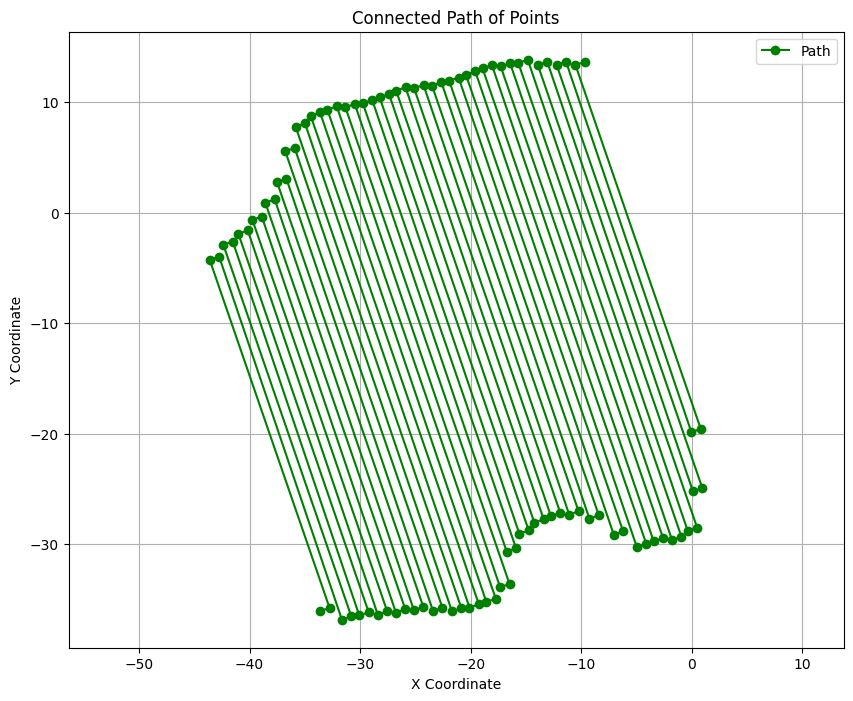

In [2]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

# Define the Excel file path and sheet name
xlsx_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'coverage_path'

# Load the provided Excel sheet into a DataFrame without headers
df = pd.read_excel(xlsx_file_path, sheet_name=sheet_name, header=None)

# Manually assign the column names
df.columns = ['Point_1_x', 'Point_1_y', 'Point_2_x', 'Point_2_y', 'Point_3_x', 'Point_3_y', 'Point_4_x', 'Point_4_y']

# Initialize lists to hold the x and y coordinates in the order of plotting
x_coords = []
y_coords = []

# Loop through the DataFrame and add the coordinates in the required order
for index, row in df.iterrows():
    x_coords.extend([row['Point_1_x'], row['Point_2_x'], row['Point_3_x'], row['Point_4_x']])
    y_coords.extend([row['Point_1_y'], row['Point_2_y'], row['Point_3_y'], row['Point_4_y']])

# Now plot the points and the connecting green line
plt.figure(figsize=(10, 8))

# Plot the red and blue dots for points 1 and 2
# plt.scatter(df['Point_1_x'], df['Point_1_y'], color='red', label='Point 1')
# plt.scatter(df['Point_2_x'], df['Point_2_y'], color='blue', label='Point 2')

# Connect the points with a green line
plt.plot(x_coords, y_coords, 'go-', label='Path')

# Set the x and y axis limits to be equal
plt.axis('equal')

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Connected Path of Points')
plt.legend()
plt.grid(True)
plt.show()


**16. Reformat the data to prepare for angle calculations**<br>
Iterate through the x, y data (i.e. the path) and calculate the angle each segment is travelling to be able to use that as input into the path generator routine.  To do that I first need to reformat the 1 row, 4 point x, y data into a series of rows with just one x, y data point for each row. Stated another way, each row of the input file consists of 4 (x,y) pairs.  Reformating it converts each row (i.e. 4 pairs) into 4 rows with 1 (x,y) pair each.<br> 

The results will be saved to a new sheet 'coverage_path_refrmttd' in the same Excel file.

<br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_coverage_path_reformat.py
</span>

**17. Visualize the reformatted series of point**

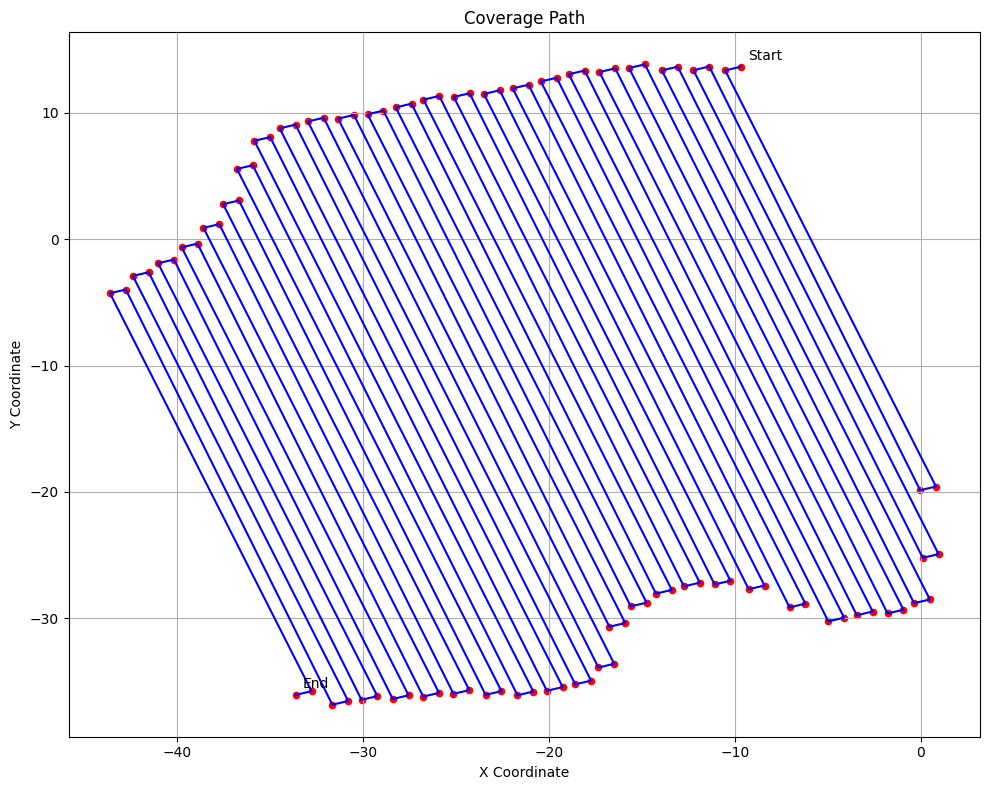

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the input file path and sheet name
input_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
input_sheet_name = 'coverage_path_refrmttd'

# Read the Excel file without headers
df = pd.read_excel(input_file_path, sheet_name=input_sheet_name, header=None)

# Assuming the first column is x and the second column is y
x = df[0].values
y = df[1].values

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b-')
plt.scatter(x, y, c='red', s=20)

# Label the start and end points
plt.annotate('Start', (x[0], y[0]), xytext=(5, 5), textcoords='offset points')
plt.annotate('End', (x[-1], y[-1]), xytext=(5, 5), textcoords='offset points')

# Customize the plot
plt.title('Coverage Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**18. Reverse the sequence if needed**<br>
In the plot above look for the 'Start' and 'End'. This script is a quick re-sort.  Consider in the future going back to the originating step and add some type of variable to accomodate different starting points.<br><br>
input_sheet_name = 'coverage_path_refrmttd'<br>
output is the same sheet
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_reverse_dubins.py
</span>

**19. Delete point from path**<br><br>When building the path there was a point between the last point of the outer rings and the first point of the first stripe.  When testing I manually removed this point to make the transition smoother.  This step is a bit of a hack to remove that point until I create more paths and go back to the earlier steps to figure out a more elegant solution.

<img src="images/path_start.png" alt="Path Start" width="300px">
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_remove_first_stripe_pt.py
</span>

**20. Add the connecting point from the ring path**<br>
Before creating the Dubins path (i.e. u-turns) I need to add the last point from the outer ring paths<br><br>
input_sheet_name = 'outer_rings_path'<br>
output_sheet_name = 'coverage_path_refrmttd'
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/path_polygon_rings/path_connect_ring_and_stripes.py
</span>

**21. Calculate the angle between points, add  lookahead and speed**<br>
The robot needs a plan that contains and x, y point plus angle, speed and lookahead distance.  This script calculates the angle and adds speed and lookahead.  For direction, keep in mind, magnetic East = 0, mag. North = 1.57 (pi/2), mag. West = 3.14 (pi) and mag. South = 4.71 (pi+(pi/2)).  One rotation is 2*Pi.<br><br>
input_sheet_name = 'coverage_path_refrmttd'<br>
output_sheet_name = 'path_with_angle'
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_add_angle_to_xy2.py
</span>

**19. Generate path using Dubins shortest path**<br>
Read in a series of waypoints from the sheet 'path_with_angle' and expand them based on the step size and angle using the Dubins shortest path library. The practical use of this is to have a Dubins path (i.e. straight segments followed by a u-turn that is shaped like a key hole).  The output will be placed in sheet 'path_dubins'. 

For an explanation for the input file can be found in the document 'Path Planning - Creating a waypoint plan using path_generator.odt' which can be found at https://github.com/jones2126/ros1_lawn_tractor_ws
<br><br>
    input_sheet_name = 'path_with_angle'<br>
    output_sheet_name = 'path_dubins'

references:
- credit to Matt Droter for an initial outline script
- https://pypi.org/project/dubins/

<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_create_dubins.py
</span>

**20. Visually check the stripes**<br>
The script below runs for ~20 seconds on the "tractor" laptop (i.e. my HP G-645) with a path of 8K points.  For future consideration the script 'path_test_plot_before_running_simulation.py' seems to run faster.  The script below will produce a plot similar to this:<br><br>
<br>Input:
- file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
- sheet_name = 'path_dubins'
- circle_center = (-10.52, -33.01) - just for visualization
- circle_radii = [6, 3.12, 2.4]  # U-turn start, Inflated, Best Fit - just for visualization
<br>
<br>Output:
<img src="images/dubins_path1.png" alt="Dubins Fig 1" width="300px">
<img src="images/dubins_path2.png" alt="Dubins Fig 2" width="300px">
<br>**Note:**<br>The obstacle/circle is hardcoded in the script.
<br><br>
<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    $ python3 ~/ros1_lawn_tractor_ws/project_notes/code_for_testing/archive/boustrophedon/path_plot_dubins.py
</span>

**21. Combining the outer rings and stripes**<br>
Input:
<br>sheet = 'outer_rings_path' - these are the rings - these run first starting with path index 0
<br>sheet = 'path_dubins' - these are the stripes
<br>
<br>Output:
<br>sheet = 'combined_path' (no header row)
<br>

- Create or clear the sheet 'combined path';
- Copy and paste sheet the sheet 'outer_rings_path' into 'combined_path'.
- Copy and paste sheet 'path_dubins_reversed' into 'combined_path'.  

I think I need to trim the first Dubins keyhole from the stripe path to simplify moving from the outer ring to the stripe.

In [6]:
print("Starting...")
import openpyxl

# Specify the input file path
input_file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'

# Load the workbook
workbook = openpyxl.load_workbook(input_file_path)
print("Loaded workbook...")
# Create or clear the 'combined path' sheet
if 'combined path' in workbook.sheetnames:
    combined_sheet = workbook['combined path']
    combined_sheet.delete_rows(1, combined_sheet.max_row)
else:
    combined_sheet = workbook.create_sheet('combined path')
print("Cleared or created combined_path; Copying 'outer_rings_path'...")
# Copy contents from 'outer_rings_path'
outer_rings_sheet = workbook['outer_rings_path']
for row in outer_rings_sheet.iter_rows(values_only=True):
    combined_sheet.append(row)
print("Appended 'outer_rings_path'; Now copying 'path_dubins'...")
# Append contents from 'path_dubins'
path_dubins_sheet = workbook['path_dubins']
for row in path_dubins_sheet.iter_rows(values_only=True):
    combined_sheet.append(row)

# Save the changes
workbook.save(input_file_path)

print("Combined sheet created successfully!")

Starting...
Loaded workbook...
Cleared or created combined_path; Copying 'outer_rings_path'...
Appended 'outer_rings_path'; Now copying 'path_dubins'...
Combined sheet created successfully!


**22. Visually check the outer path and the stripes together**<br>
This is simply a visualization step to review the sheet 'combined_path'.  The input files have the x, y, theta, lookahead and speed as columns and are therefore ready to be input files to pure_pursuit.cpp

Open the script and update hardcoding for filepath names**<br>

The 'stripe' path is output from <u>~Step 10</u> above.  In the Jupyter cell there is a statement 'output_file_waypoints = working_directory + "test_generator_output.txt"' which appends text to the working directory.  The full name is printed when the cell finishes execution.  That name should be used for the 'blue path' filename. 

The ring path is output from script 'path_ll2xy_2inner_rings_v4.py'.  There is a variable 'finished_xy_file' that defines this file.  So whatever name is used there should be used for the 'green path' filename.

Attempting to read file: /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx
Sheet name: combined path
Available sheets: ['SiteSurvey', 'RawInnerRings', 'IntersectionPoints', 'ArcPath', 'UpdatedPath', 'intercepts', 'boustrphdn_segmnts', 'boustrphdn_trimmed', 'path_dubins_reversed', 'outer_rings_path', 'Obstcl_list', 'Obstacle 1', 'stripes_trimmed', 'coverage_path', 'coverage_path_refrmttd', 'path_with_angle', 'path_dubins', 'combined path']


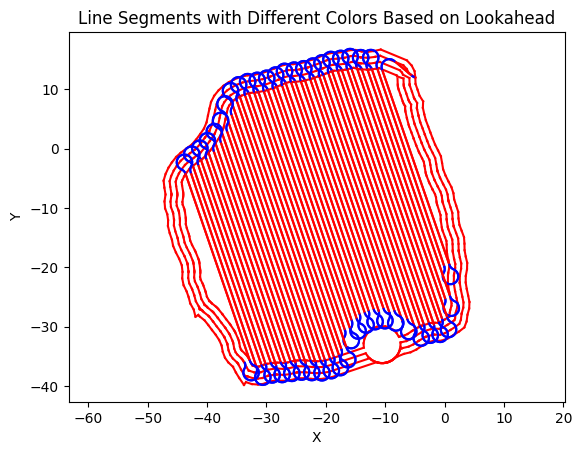

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Function to read data from an Excel sheet
def read_data(file_path, sheet_name):
    print(f"Attempting to read file: {file_path}")
    print(f"Sheet name: {sheet_name}")
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    # Try to read the Excel file and get sheet names
    try:
        xl = pd.ExcelFile(file_path)
        print(f"Available sheets: {xl.sheet_names}")
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

    # Try reading the sheet
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        df.columns = ['x', 'y', 'theta', 'lookahead', 'speed']
        points = df[['x', 'y', 'lookahead']].values.tolist()
        return points
    except ValueError as e:
        print(f"Error reading sheet: {e}")
        return None

# Function to plot the data
def plot_data(points):
    if points is None:
        print("No data to plot.")
        return
    
    for i in range(len(points) - 1):
        x1, y1, lookahead1 = points[i]
        x2, y2, lookahead2 = points[i + 1]
        color = 'red' if lookahead1 == 2.5 else 'blue'
        plt.plot([x1, x2], [y1, y2], color=color)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line Segments with Different Colors Based on Lookahead')
    plt.axis("equal")
    plt.show()

# Main
file_path = '/home/tractor/ros1_lawn_tractor_ws/project_notes/paths/Collins_Dr_62/site1_20240513/collins_dr_62_A_from_rosbag_step1_20240513_2.xlsx'
sheet_name = 'combined path'
data_points = read_data(file_path, sheet_name)
plot_data(data_points)

**Using the path just created**<br>
<br>Copy {file} to ~input_path.txt 
<br>$ cp -i /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/collins_62_step2.txt.txt /home/tractor/ros1_lawn_tractor_ws/project_notes/paths/input_path.txt
<br><br>The file 'input_path.txt' is the default path used for the program 'pure_pursuit.cpp' so I expect it would be possible to use an arguement when starting the program if you wanted to make use of a different path planning file.

**Changes required to improve the path above:**<br>
1. Where the u-turns and other line segments overlap is 'waste' in that it would lead to going over the same path twice.  I'm thinking to only run the two most outer rings and add more stripes to eliminate the white space after testing.  Just a thought at the moment.
2. Add stripes to the beginning and end to reduce the white space.  Go back to where the Boustrophedon line segments are created.  Maybe use the outer most polygon and then trim the line segments with the inner most polygon.